In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pycorr 

In [2]:
def web_classification(n_data, n_random):
    assert len(n_data) == len(n_random)
    n_points = len(n_data)
    r_values = (n_data-n_random)/(n_data+n_random)
    web_class = np.zeros(n_points, dtype=int)
    lower_limit = -0.90
    upper_limit = 0.90
    is_void = r_values <= lower_limit
    is_sheet = (r_values > lower_limit) & (r_values<=0.0)
    is_filament = (r_values>0.0) & (r_values <= upper_limit)
    is_peak = (r_values > upper_limit)
    web_class[is_void] = 0
    web_class[is_sheet] = 1
    web_class[is_filament] = 2
    web_class[is_peak] = 3
    return web_class  

In [3]:
pos_data = np.loadtxt("../data/TNG/TNG300-1/pos/subhalo_massive_xyz.dat")
pos_rand = np.loadtxt("../data/TNG/TNG300-1/pos/random_000_subhalo_massive_xyz.dat")
pos_data = pos_data[:,0:3]/1000
pos_rand = pos_rand[:,0:3]/1000
n_con_random = np.loadtxt("../data/TNG/TNG300-1/web/random_000_subhalo_massive_xyz_subhalo_massive_xyz_nconnections.dat")
n_con_data = np.loadtxt("../data/TNG/TNG300-1/web/subhalo_massive_xyz_random_000_subhalo_massive_xyz_nconnections.dat")
web_data = web_classification(n_con_data[:,0], n_con_data[:,1])
web_random = web_classification(n_con_random[:,0], n_con_random[:,1])

pos_data = np.loadtxt("../data/SDSS/pos/mag_r_limited_xyz.dat")
pos_rand = np.loadtxt("../data/SDSS/pos/random_000_mag_r_limited_xyz.dat")
pos_rand_A = np.loadtxt("../data/SDSS/pos/random_large_A_mag_r_limited_xyz.dat")
pos_rand_B = np.loadtxt("../data/SDSS/pos/random_large_B_mag_r_limited_xyz.dat")

pos_data = pos_data[:,0:3]
pos_rand = pos_rand[:,0:3]
pos_rand_A = pos_rand_A[:,0:3]
pos_rand_B = pos_rand_B[:,0:3]

n_con_random = np.loadtxt("../data/SDSS/web/random_000_mag_r_limited_xyz_mag_r_limited_xyz_nconnections.dat")
n_con_data = np.loadtxt("../data/SDSS/web/mag_r_limited_xyz_random_000_mag_r_limited_xyz_nconnections.dat")
web_data = web_classification(n_con_data[:,0], n_con_data[:,1])
web_random = web_classification(n_con_random[:,0], n_con_random[:,1])

In [4]:
points = {}

is_void = web_random==0
points['rand_void'] = pos_rand[is_void]

is_sheet = web_random==1
points['rand_sheet'] = pos_rand[is_sheet]

is_filament = web_random==2
points['rand_filament'] = pos_rand[is_filament]

is_sheet = web_data==1
points['data_sheet'] = pos_data[is_sheet]

is_filament = web_data==2
points['data_filament'] = pos_data[is_filament]

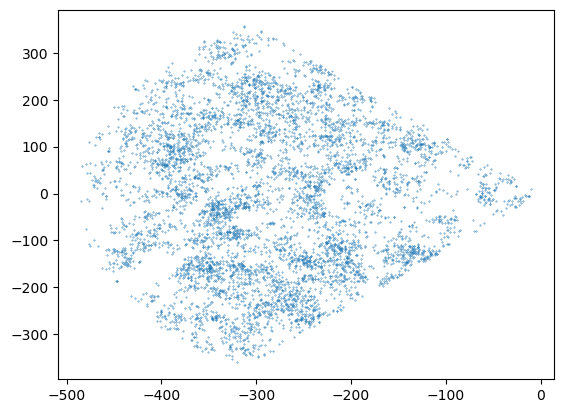

In [5]:
plt.scatter(points['rand_void'][:,0], points['rand_void'][:,1], s=0.1)

In [31]:
for A in points.keys():
    print(A)

rand_void
rand_sheet
rand_filament
data_sheet
data_filament


In [10]:
edges = (np.linspace(0.01, 80, 21), np.linspace(-1., 1., 61))

results = {}
for A in points.keys():
    for B in points.keys():
        name = A+'_'+B
        #results[name] = pycorr.TwoPointCorrelationFunction('smu', edges, points[A], data_positions2=points[B], 
        #                                                  boxsize=205.0, position_type="pos", los="x")
        
        if A != B:
            print('diferentes', name)
            results[name] = pycorr.TwoPointCorrelationFunction('smu', edges, points[A], data_positions2=points[B], 
                                                               randoms_positions1=pos_rand_A, randoms_positions2=pos_rand_B,
                                                               position_type="pos")
        else:
            print('iguales', name)
            results[name] = pycorr.TwoPointCorrelationFunction('smu', edges, points[A], 
                                                               randoms_positions1=pos_rand_A,
                                                               position_type="pos")
        #print(results[name].get_corr(ells=[0], return_sep=True))

iguales rand_void_rand_void
diferentes rand_void_rand_sheet
diferentes rand_void_rand_filament
diferentes rand_void_data_sheet
diferentes rand_void_data_filament
diferentes rand_sheet_rand_void
iguales rand_sheet_rand_sheet
diferentes rand_sheet_rand_filament
diferentes rand_sheet_data_sheet
diferentes rand_sheet_data_filament
diferentes rand_filament_rand_void
diferentes rand_filament_rand_sheet
iguales rand_filament_rand_filament
diferentes rand_filament_data_sheet
diferentes rand_filament_data_filament
diferentes data_sheet_rand_void
diferentes data_sheet_rand_sheet
diferentes data_sheet_rand_filament
iguales data_sheet_data_sheet
diferentes data_sheet_data_filament
diferentes data_filament_rand_void
diferentes data_filament_rand_sheet
diferentes data_filament_rand_filament
diferentes data_filament_data_sheet
iguales data_filament_data_filament


In [11]:
xiell = {}
for name in results.keys():
    print(name)
    s, xiell[name] = results[name].get_corr(ells=[0,2], return_sep=True)

rand_void_rand_void
rand_void_rand_sheet
rand_void_rand_filament
rand_void_data_sheet
rand_void_data_filament
rand_sheet_rand_void
rand_sheet_rand_sheet
rand_sheet_rand_filament
rand_sheet_data_sheet
rand_sheet_data_filament
rand_filament_rand_void
rand_filament_rand_sheet
rand_filament_rand_filament
rand_filament_data_sheet
rand_filament_data_filament
data_sheet_rand_void
data_sheet_rand_sheet
data_sheet_rand_filament
data_sheet_data_sheet
data_sheet_data_filament
data_filament_rand_void
data_filament_rand_sheet
data_filament_rand_filament
data_filament_data_sheet
data_filament_data_filament


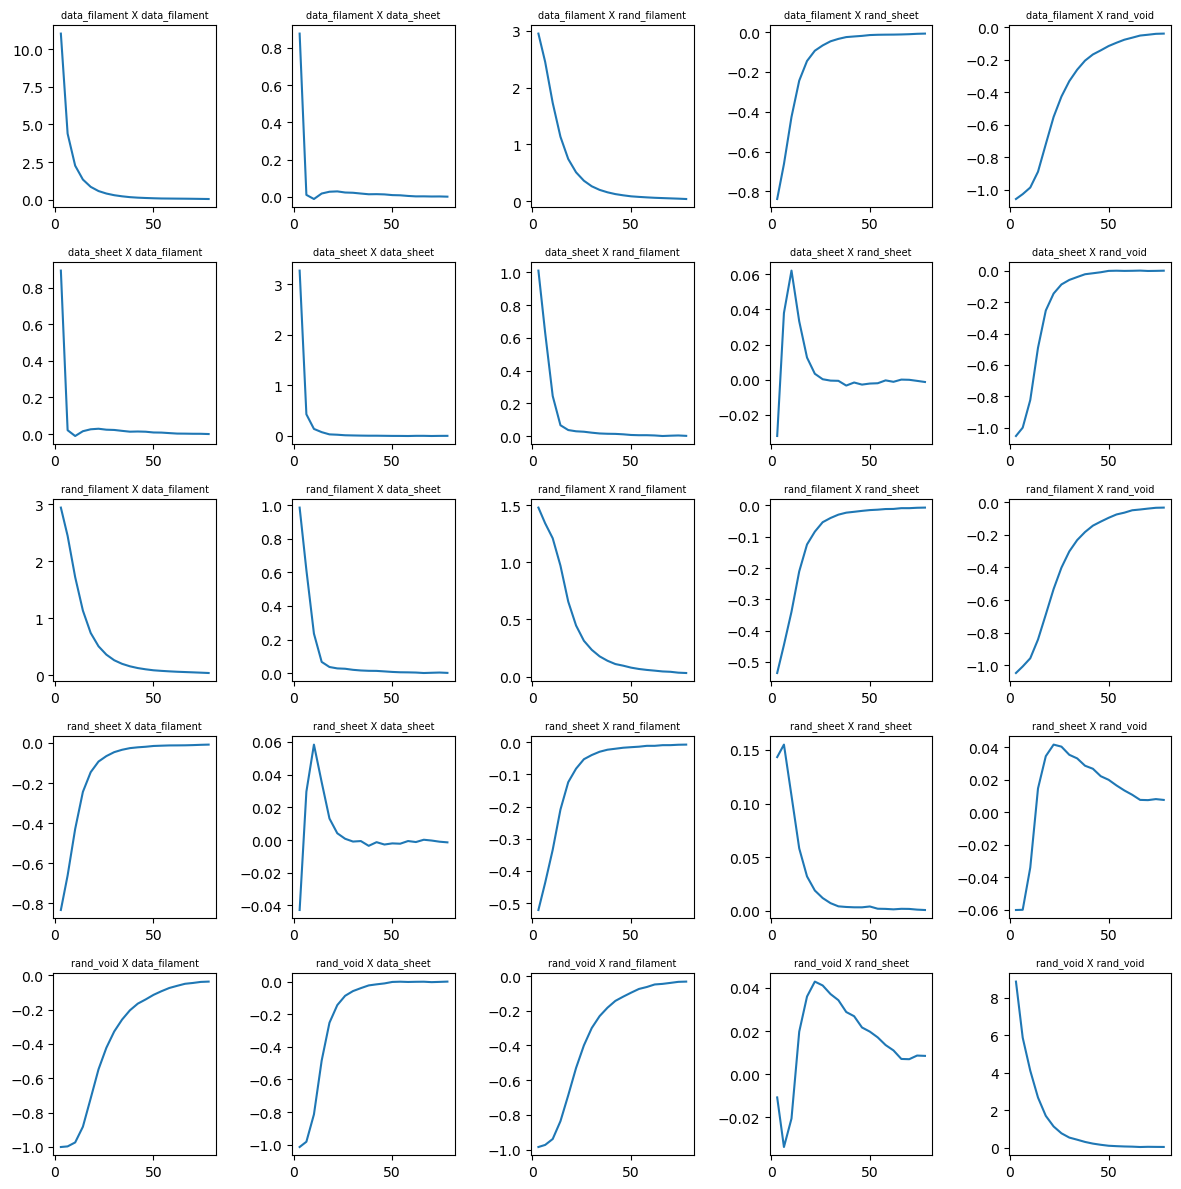

In [16]:
plt.figure(figsize=(12,12))
i = 0
all_names = ['data_filament', 'data_sheet', 'rand_filament', 'rand_sheet', 'rand_void']
for A in all_names:
    for B in all_names:
        i += 1
        name = A+'_'+B
        plt.subplot(5,5,i)
        plt.plot(s, xiell[name][0])
        title = A+' X '+B
        plt.title(title, fontsize=7)
        
plt.tight_layout()

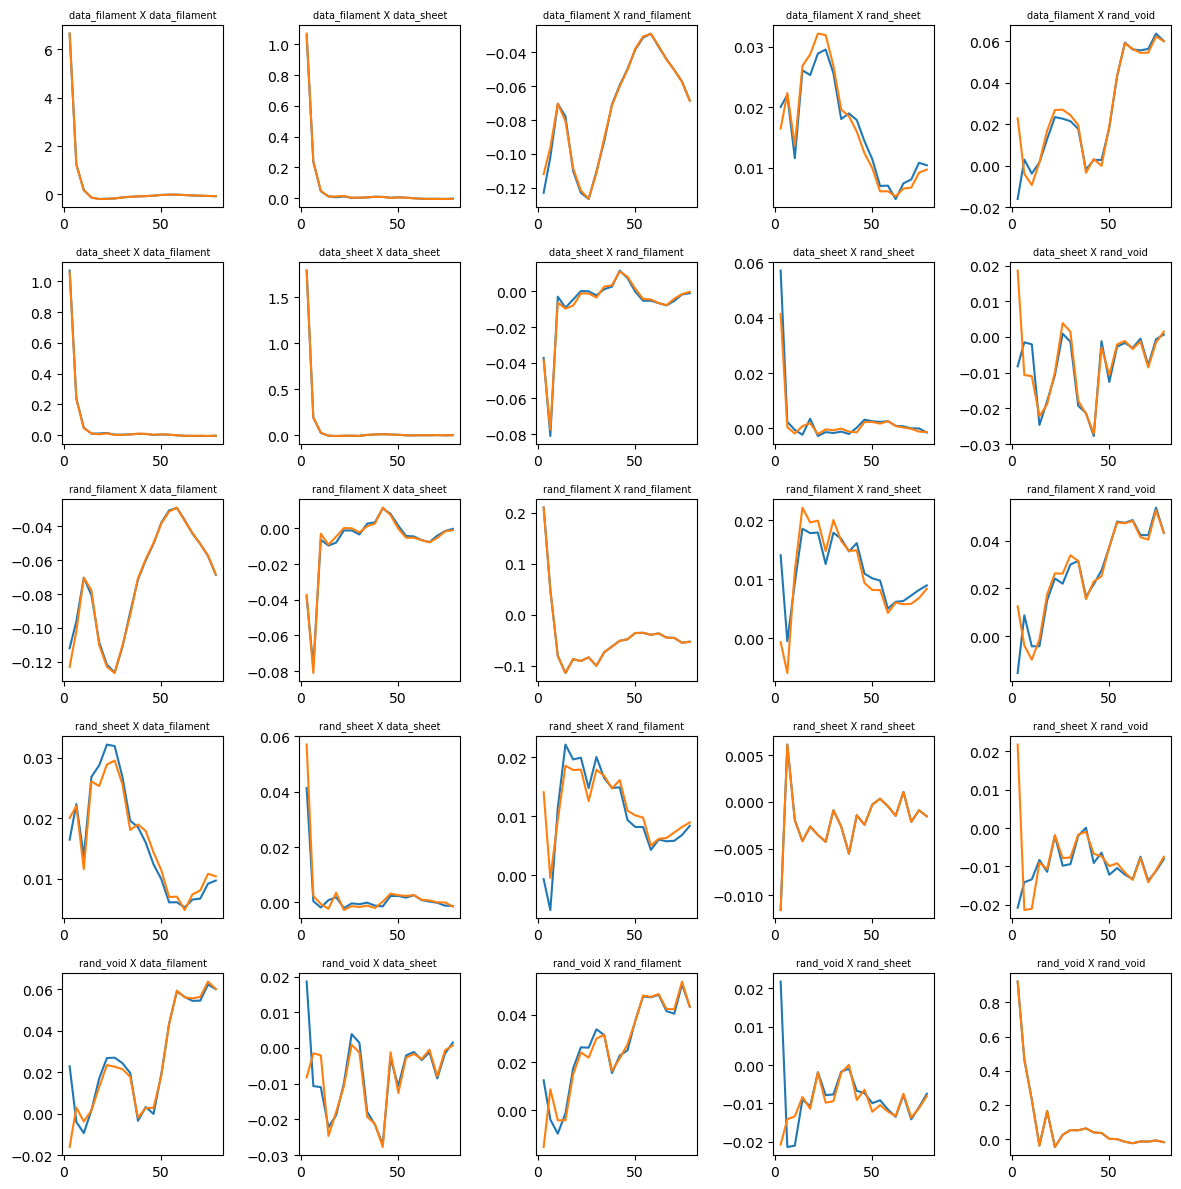

In [15]:
plt.figure(figsize=(12,12))
i = 0
all_names = ['data_filament', 'data_sheet', 'rand_filament', 'rand_sheet', 'rand_void']
for A in all_names:
    for B in all_names:
        i += 1
        name = A+'_'+B
        plt.subplot(5,5,i)
        plt.plot(s, xiell[name][1])
        title = A+' X '+B
        plt.title(title, fontsize=7)
plt.tight_layout()

In [23]:
all_names = ['data_filament', 'data_sheet', 'rand_filament', 'rand_sheet', 'rand_void']
for A in all_names:
    for B in all_names:
        name = A+'_'+B
        fn = 'results_'+name+'.npy'
        print(fn)
        results[name].save(fn)

results_data_filament_data_filament.npy
results_data_filament_data_sheet.npy
results_data_filament_rand_filament.npy
results_data_filament_rand_sheet.npy
results_data_filament_rand_void.npy
results_data_sheet_data_filament.npy
results_data_sheet_data_sheet.npy
results_data_sheet_rand_filament.npy
results_data_sheet_rand_sheet.npy
results_data_sheet_rand_void.npy
results_rand_filament_data_filament.npy
results_rand_filament_data_sheet.npy
results_rand_filament_rand_filament.npy
results_rand_filament_rand_sheet.npy
results_rand_filament_rand_void.npy
results_rand_sheet_data_filament.npy
results_rand_sheet_data_sheet.npy
results_rand_sheet_rand_filament.npy
results_rand_sheet_rand_sheet.npy
results_rand_sheet_rand_void.npy
results_rand_void_data_filament.npy
results_rand_void_data_sheet.npy
results_rand_void_rand_filament.npy
results_rand_void_rand_sheet.npy
results_rand_void_rand_void.npy


In [6]:
all_names = ['data_filament', 'data_sheet', 'rand_filament', 'rand_sheet', 'rand_void']
reload_results = {}
for A in all_names:
    for B in all_names:
        name = A+'_'+B
        fn = 'results_'+name+'.npy'
        print(fn)
        reload_results[name] = pycorr.TwoPointEstimator.load(fn)

results_data_filament_data_filament.npy
results_data_filament_data_sheet.npy
results_data_filament_rand_filament.npy
results_data_filament_rand_sheet.npy
results_data_filament_rand_void.npy
results_data_sheet_data_filament.npy
results_data_sheet_data_sheet.npy
results_data_sheet_rand_filament.npy
results_data_sheet_rand_sheet.npy
results_data_sheet_rand_void.npy
results_rand_filament_data_filament.npy
results_rand_filament_data_sheet.npy
results_rand_filament_rand_filament.npy
results_rand_filament_rand_sheet.npy
results_rand_filament_rand_void.npy
results_rand_sheet_data_filament.npy
results_rand_sheet_data_sheet.npy
results_rand_sheet_rand_filament.npy
results_rand_sheet_rand_sheet.npy
results_rand_sheet_rand_void.npy
results_rand_void_data_filament.npy
results_rand_void_data_sheet.npy
results_rand_void_rand_filament.npy
results_rand_void_rand_sheet.npy
results_rand_void_rand_void.npy


In [8]:
xiell = {}
for name in reload_results.keys():
    print(name)
    s, xiell[name] = reload_results[name].get_corr(ells=[0,2], return_sep=True)

data_filament_data_filament
data_filament_data_sheet
data_filament_rand_filament
data_filament_rand_sheet
data_filament_rand_void
data_sheet_data_filament
data_sheet_data_sheet
data_sheet_rand_filament
data_sheet_rand_sheet
data_sheet_rand_void
rand_filament_data_filament
rand_filament_data_sheet
rand_filament_rand_filament
rand_filament_rand_sheet
rand_filament_rand_void
rand_sheet_data_filament
rand_sheet_data_sheet
rand_sheet_rand_filament
rand_sheet_rand_sheet
rand_sheet_rand_void
rand_void_data_filament
rand_void_data_sheet
rand_void_rand_filament
rand_void_rand_sheet
rand_void_rand_void


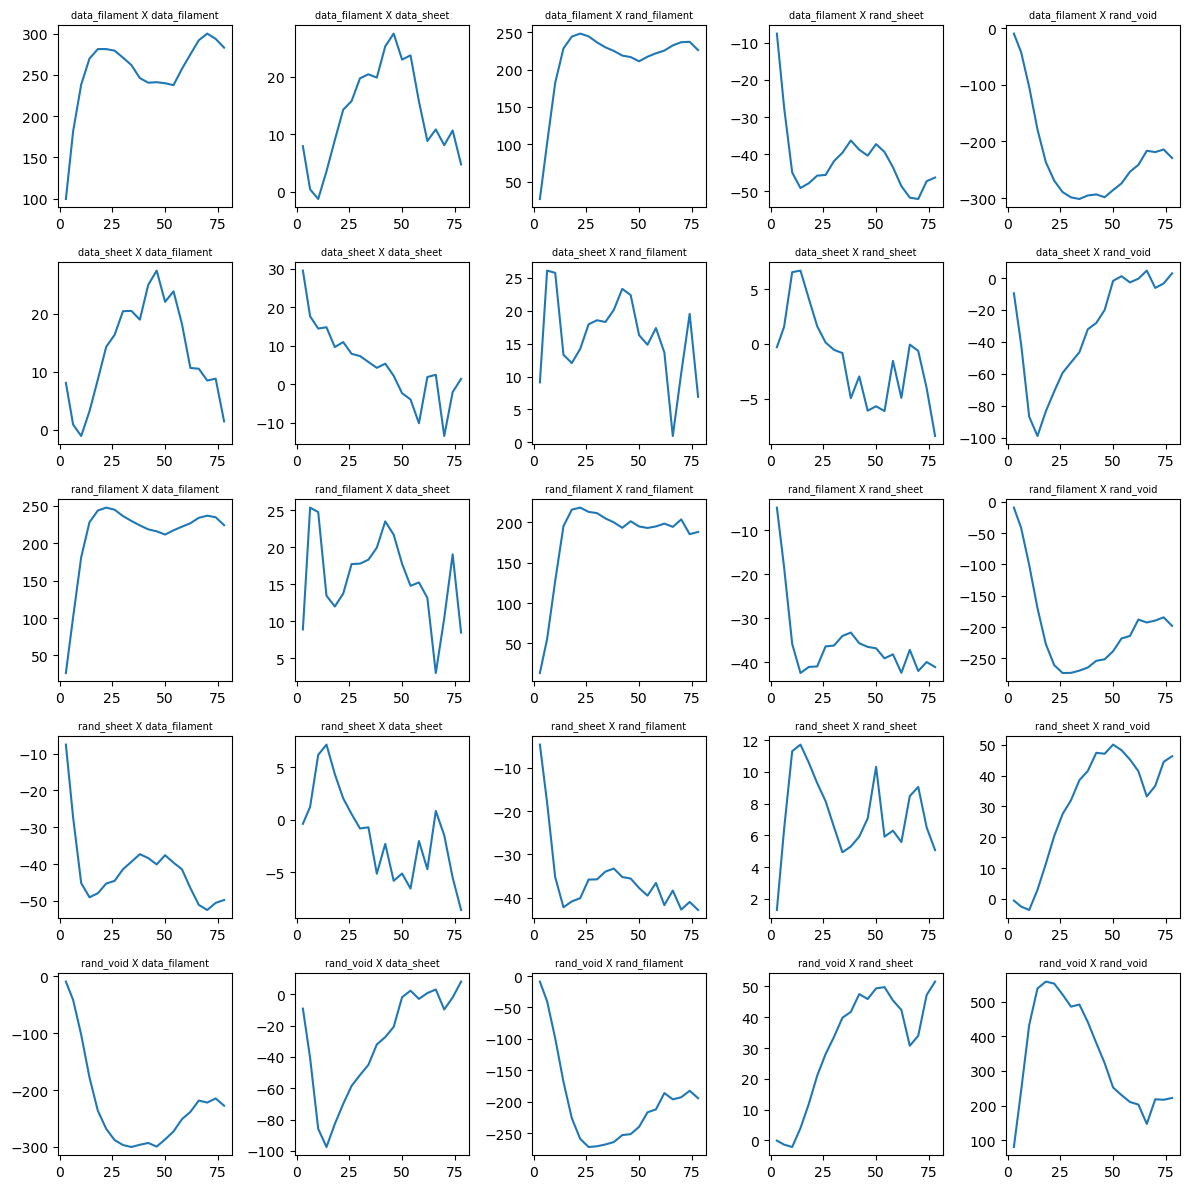

In [10]:
plt.figure(figsize=(12,12))
i = 0
all_names = ['data_filament', 'data_sheet', 'rand_filament', 'rand_sheet', 'rand_void']
for A in all_names:
    for B in all_names:
        i += 1
        name = A+'_'+B
        plt.subplot(5,5,i)
        plt.plot(s, xiell[name][0]*s*s)
        title = A+' X '+B
        plt.title(title, fontsize=7)
        
plt.tight_layout()

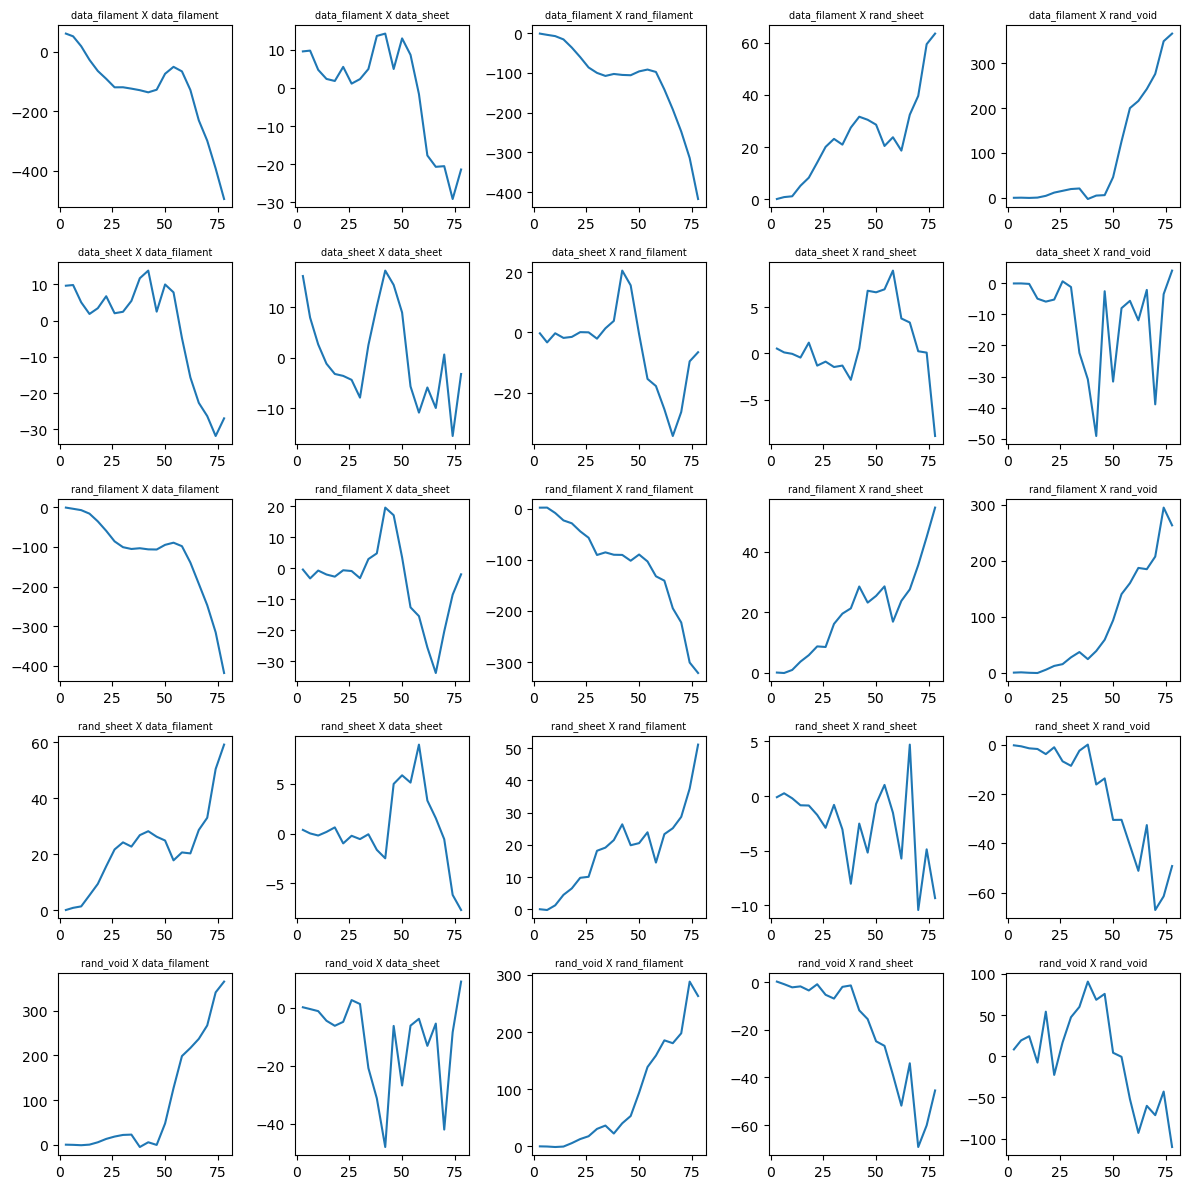

In [11]:
plt.figure(figsize=(12,12))
i = 0
all_names = ['data_filament', 'data_sheet', 'rand_filament', 'rand_sheet', 'rand_void']
for A in all_names:
    for B in all_names:
        i += 1
        name = A+'_'+B
        plt.subplot(5,5,i)
        plt.plot(s, xiell[name][1]*s*s)
        title = A+' X '+B
        plt.title(title, fontsize=7)
plt.tight_layout()